<a href="https://colab.research.google.com/github/shubham-ai/PyTorch/blob/master/PytorchTransferLearningResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/Colab Notebooks/Pytorch'


   

/content/drive/My Drive/Colab Notebooks/Pytorch


In [3]:
!ls

CatDogCheckpoint.pth		   Cat_Dog_data  Untitled0.ipynb
CatDogClassificationPytorch.ipynb  __MACOSX


In [7]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

# %matplotlib inline

!pip install Pillow==4.0.0
!pip install PIL
!pip install image

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  [PIL]
You must restart the runtime in order to use newly installed versions.
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [0]:
import torch 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import cv2
from torchvision import datasets, transforms
import torchvision.datasets as datasets
from torch import optim
from torch import nn, optim

import torch.nn.functional as F
import numpy as np
import numpy
from torchvision import datasets, transforms, models



In [0]:
data_dir = '/content/drive/My Drive/Colab Notebooks/Pytorch/Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [11]:
model = models.resnet152(pretrained=True)
# model = models.densenet121(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
# import time
# for device in ['cpu', 'cuda']:

#     criterion = nn.NLLLoss()
#     # Only train the classifier parameters, feature parameters are frozen
#     optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

#     model.to(device)

#     for ii, (inputs, labels) in enumerate(trainloader):

#         # Move input and label tensors to the GPU
#         inputs, labels = inputs.to(device), labels.to(device)

#         start = time.time()

#         outputs = model.forward(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         if ii==3:
#             break
        
#     print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

In [0]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    print(image.shape)
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [0]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 64, 64).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        pass
        ax2.set_yticklabels(np.arange(2))
    elif version == "CatDog":
        ax2.set_yticklabels(['Cat','Dog'])
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

tensor([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])
torch.Size([64, 3, 224, 224])
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


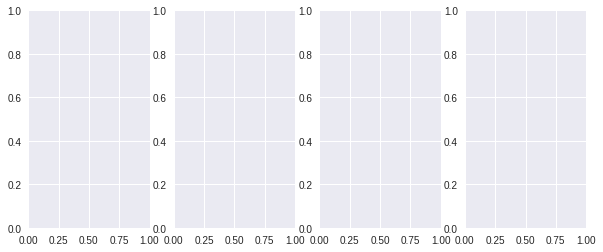

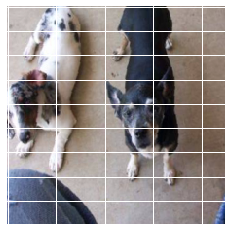

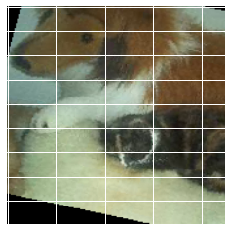

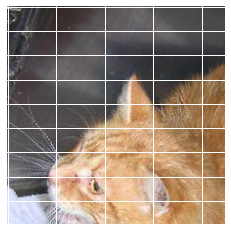

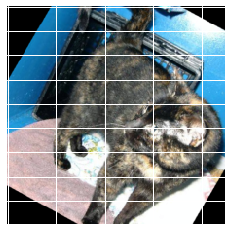

In [0]:
%matplotlib inline

data_iter = iter(trainloader)
next(data_iter)

images, labels = next(data_iter)
print(labels)
print(images.shape)
fig = plt.figure(figsize=(10,4))
ax=[]
for i in range(4):
    image = np.squeeze(images[i])
#     print(image2.shape,gray.shape)
#     gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ax.append( fig.add_subplot(1, 4, i+1) )
    imshow(image)

# plt.show()  # finally, render the plot

In [0]:
cuda = torch.cuda.is_available()
print(cuda)

True


In [0]:
# model

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 1500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(1500,512)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(p=0.3)),
                          ('fc3', nn.Linear(512, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.fc = classifier

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

model.to(device);

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()
            
torch.save(model.state_dict(), "resNetCatDog.pth")

Epoch 1/2.. Train loss: 10.697.. Test loss: 1.933.. Test accuracy: 0.512
Epoch 1/2.. Train loss: 1.209.. Test loss: 0.470.. Test accuracy: 0.849
Epoch 1/2.. Train loss: 0.569.. Test loss: 0.354.. Test accuracy: 0.842
Epoch 1/2.. Train loss: 0.408.. Test loss: 0.138.. Test accuracy: 0.947
Epoch 1/2.. Train loss: 0.313.. Test loss: 0.100.. Test accuracy: 0.970
Epoch 1/2.. Train loss: 0.195.. Test loss: 0.051.. Test accuracy: 0.983
Epoch 1/2.. Train loss: 0.196.. Test loss: 0.049.. Test accuracy: 0.981
Epoch 1/2.. Train loss: 0.146.. Test loss: 0.061.. Test accuracy: 0.979
Epoch 1/2.. Train loss: 0.173.. Test loss: 0.062.. Test accuracy: 0.974
Epoch 1/2.. Train loss: 0.201.. Test loss: 0.070.. Test accuracy: 0.976
Epoch 1/2.. Train loss: 0.140.. Test loss: 0.045.. Test accuracy: 0.986
Epoch 1/2.. Train loss: 0.174.. Test loss: 0.104.. Test accuracy: 0.965
Epoch 1/2.. Train loss: 0.210.. Test loss: 0.044.. Test accuracy: 0.984
Epoch 1/2.. Train loss: 0.107.. Test loss: 0.059.. Test accurac

In [0]:
# model = models.densenet121(pretrained=True)
# model

In [0]:
# # Use GPU if it's available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.densenet121(pretrained=True)

# # Freeze parameters so we don't backprop through them
# for param in model.parameters():
#     param.requires_grad = False
    
# model.classifier = nn.Sequential(nn.Linear(1024, 512),
#                                  nn.ReLU(),
#                                  nn.Dropout(p=0.2),
#                                  nn.Linear(512, 2),
#                                  nn.LogSoftmax(dim=1))

# criterion = nn.NLLLoss()

# # Only train the classifier parameters, feature parameters are frozen
# optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

# model.to(device);

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [0]:
# epochs = 10
# steps = 0
# running_loss = 0
# print_every = 5
# for epoch in range(epochs):
#     for inputs, labels in trainloader:
#         steps += 1
#         # Move input and label tensors to the default device
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         optimizer.zero_grad()
        
#         logps = model.forward(inputs)
#         loss = criterion(logps, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
        
#         if steps % print_every == 0:
#             test_loss = 0
#             accuracy = 0
#             model.eval()
#             with torch.no_grad():
#                 for inputs, labels in testloader:
#                     inputs, labels = inputs.to(device), labels.to(device)
#                     logps = model.forward(inputs)
#                     batch_loss = criterion(logps, labels)
                    
#                     test_loss += batch_loss.item()
                    
#                     # Calculate accuracy
#                     ps = torch.exp(logps)
#                     top_p, top_class = ps.topk(1, dim=1)
#                     equals = top_class == labels.view(*top_class.shape)
#                     accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
#             print(f"Epoch {epoch+1}/{epochs}.. "
#                   f"Train loss: {running_loss/print_every:.3f}.. "
#                   f"Test loss: {test_loss/len(testloader):.3f}.. "
#                   f"Test accuracy: {accuracy/len(testloader):.3f}")
#             running_loss = 0
#             model.train()
# torch.save(model.state_dict(), "Checkpoint3.pth")

In [0]:
# torch.save(model.state_dict(), "Checkpoint2.pth")